In [1]:
import glob
import os
import pickle
import xml.etree.ElementTree as ET
from os import listdir, getcwd
from os.path import join

In [2]:
save_to = "labels/"
save_from = "XMLGroundtruth_v2.0/"
if not os.path.exists(save_to):
    os.makedirs(save_to)

In [3]:
ldir =os.listdir(save_from)

In [4]:
ldir

['aah97e00-page02_1.xml',
 'aah97e00-page02_2.xml',
 'aam09c00.xml',
 'aao54e00_1.xml',
 'aao54e00_2.xml',
 'abm69c00.xml',
 'acr64d00.xml',
 'adh36e00-page2_1.xml',
 'adh36e00-page2_2.xml',
 'adh36e00_1.xml',
 'adh36e00_2.xml',
 'adn64a00-page02_1.xml',
 'adn64a00-page02_2.xml',
 'adn64a00-page02_3.xml',
 'adp7aa00.xml',
 'adq65f00.xml',
 'aeb95e00.xml',
 'aee44c00.xml',
 'aeq93a00.xml',
 'aex05f00_1.xml',
 'aex05f00_2.xml',
 'afm90c00-first_1.xml',
 'afm90c00-first_2.xml',
 'agw39d00.xml',
 'ahs60f00.xml',
 'aik94f00-page02_1.xml',
 'aik94f00-page02_2.xml',
 'ail70a00.xml',
 'aji32e00-page02_1.xml',
 'aji32e00-page02_2.xml',
 'ajj10e00.xml',
 'ajy01c00.xml',
 'ajz31e00.xml',
 'aki32e00.xml',
 'ald41a00-ernest.xml',
 'alk3aa00.xml',
 'alz35d00.xml',
 'ama91d00-page03_1.xml',
 'ama91d00-page03_2.xml',
 'ama91d00-page03_3.xml',
 'amk00a00.xml',
 'amw93e00.xml',
 'amy31e00.xml',
 'ank41e00.xml',
 'anr29e00-page02_1.xml',
 'anr29e00-page02_2.xml',
 'anv39d00.xml',
 'api68d00.xml',
 'arr09

In [5]:
from xml.dom import minidom

In [24]:
for file in ldir: 
    write_file = file.split('.')[0]+ ".txt"
    xml_parser = minidom.parse(save_from+file)
    dl_zones = xml_parser.getElementsByTagName("DL_ZONE")
    
    dl_pages = xml_parser.getElementsByTagName("DL_PAGE")
    pg_h = int(dl_pages[0].attributes['height'].value)
    pg_w = int(dl_pages[0].attributes['width'].value)
    
    with open(save_to + write_file,'w') as f:
        for zone in dl_zones: 
            height = int(zone.attributes['height'].value)
            width = int(zone.attributes['width'].value)
            
            y1 = int(zone.attributes['row'].value) 
            x1 = int(zone.attributes['col'].value)
            
            x2 = x1 + width 
            y2 = y1 + height
            
            
            x_centre = (x1 + width*0.5)/pg_w  
            y_centre = (y1 + height* 0.5)/pg_h 
            w = width/pg_w
            h = height/pg_h    
        
            f.write("0 {} {} {} {}\n".format(x_centre, y_centre, w, h))

In [15]:
import cv2 

In [16]:
img = cv2.imread("SinglePageTIF/amw93e00.tif",0)

In [17]:
import matplotlib.pyplot as plt 

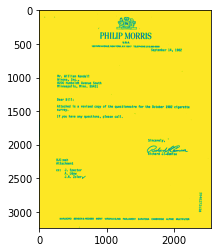

In [18]:
plt.imshow(img)

In [19]:
img.shape

(3239, 2560)

In [20]:
#cv2.rectangle(img, pt1, pt2, color, thickness, lineType, shift)

In [21]:
# pt1 = (1998-int(624/2), 1594-int(160/2))
# pt2 = (1998+int(624/2), int(160/2)+1594)
# pt1 = (1998, 1594)
# pt2 = (1998+int(624), int(160)+1594)
pt1 = (1594, 1998)
pt2 = (1594+int(624), int(160)+1998)
color = (220,20,60)

img2 = cv2.rectangle(img, pt1 , pt2, color,2)

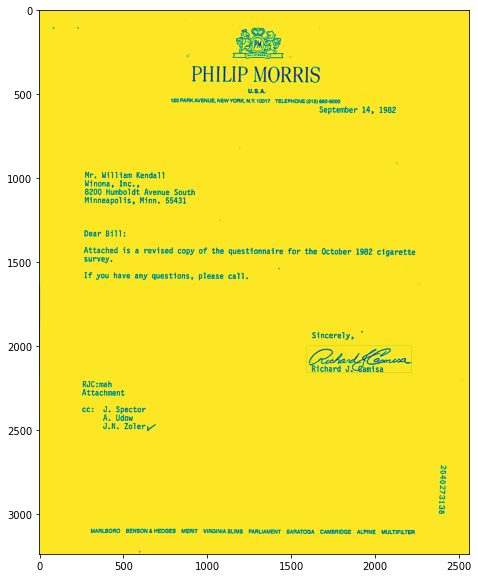

In [22]:
plt.figure(figsize =(10,10))
plt.imshow(img2)